# Analysis of v-Abl proB DMSO STI+ 2 color

by Pu Zheng

2021.4.2

1. EM algorithm has been updated.

# 0. required packages for h5py

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

8532


# 1. Create field-of-view class

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(External.Fitting_v4)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

<module 'ImageAnalysis3.spot_tools.fitting' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\spot_tools\\fitting.py'>

## 1.1 set parameters

In [3]:
fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_1\20210326-proB_STI_DMSO_CTP-08_2color',
             'save_folder':r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210326_IgH_proB_DMSO',
             #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201012-Corrections_2color',
             'shared_parameters':{
                     'single_im_size':[35,2048,2048],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':500,
                     'max_num_seeds': 2500,
                     'spot_seeding_th':125,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 },             
             }

fov_ids = np.arange(3,23)

## 1.2 process images into spots

In [4]:
reload(io_tools.load)
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes
overwrite_spots = False
overwrite_chrom = False
intensity_th = 200

spots_list_list = []
chrom_coords_list = []

for _fov_id in fov_ids:

    # create fov class
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False,
                                              )
    break
    # process image into spots
    id_list, spot_list = fov._process_image_to_spots('unique', 
                                                     _load_common_reference=True,
                                                     _load_with_multiple=False,
                                                     _save_images=True,
                                                     _warp_images=False, 
                                                     _overwrite_drift=False,
                                                     _overwrite_image=False,
                                                     _overwrite_spot=overwrite_spots,
                                                     _verbose=True)
    # identify chromosomes
    chrom_im = fov._load_chromosome_image(_type='reverse', 
                                          _overwrite=overwrite_chrom)
    chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_filt_size=4, 
                                                                   _binary_per_th=99.75, 
                                                                   _morphology_size=2,
                                                                   _overwrite=overwrite_chrom)
    fov._load_from_file('unique')

    chrom_coords = fov._select_chromosome_by_candidate_spots(_good_chr_loss_th=0.25,
                                                             _cand_spot_intensity_th=intensity_th,
                                                             _save=True, 
                                                             _overwrite=overwrite_chrom)    
    # append
    spots_list_list.append(fov.unique_spots_list)
    chrom_coords_list.append(fov.chrom_coords)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 74
- Number of field of views: 63
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_1\20210326-proB_STI_DMSO_CTP-08_2color\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
dict_keys(['H0R0', 'H1R65', 'H2R66', 'H3R67', 'H4R68', 'H5R69', 'H6R70', 'H7R71', 'H8R72', 'H9R49', 'H10R50', 'H11R51', 'H12R52', 'H13R53', 'H14R54', 'H15R55', 'H16R56', 'H17R57', 'H18R58', 'H19R59', 'H20R60', 'H21R61', 'H22R62', 'H23R63', 'H24R64', 'H25R33', 'H26R34', 'H27R35', 'H28R36', 'H29R37', 'H30R38', 'H31R39', 'H32R40', 'H33R41', 'H34R42', 'H35R43', 'H36R44', 'H37R45', 'H38R46', 'H39R47', 'H40R48', 'H41R17', 'H42R18', 'H43R19', 'H44R20', 'H45R21', 'H46R22', 'H47R23', 'H48R24', 'H49R1', 'H50R2', 'H51R3', 'H52R4', 'H53R5', 'H54R6', 'H55R7', 'H56R8', 'H57R9', 'H58R10', 'H59R11', 'H60R12', 'H61R13', 'H62R14', 'H63R15', 'H64R16', 'H65R25', 'H66R

In [5]:
fov._load_from_file('unique')
fov.unique_ids

+ loading unique from file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210326_IgH_proB_DMSO\Conv_zscan_03.hdf5
++ finish loading unique in 0.736s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1467: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


array([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 321, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 337, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 379, 380,
       381, 382, 383, 384, 386, 387, 388, 389, 390, 391, 392, 393, 394,
       395])

In [6]:
cand_chr_spots_list = []
cand_fov_ids = []
snr_th = 1.5
intensity_th = 200

for _i, _fov_id in enumerate(fov_ids):
    fov_cand_chr_spots_list = [[] for _ct in chrom_coords_list[_i]]
    # finalize candidate spots
    for _spots in spots_list_list[_i]:
        # 
        #_kept_spots = _spots[_spots[:,0]/_spots[:,4]+1  >= snr_th]
        _kept_spots = _spots[_spots[:,0] > intensity_th]
        #
        _cands_list = assign_spots_to_chromosomes(_kept_spots, chrom_coords_list[_i])
        for _j, _cands in enumerate(_cands_list):
            fov_cand_chr_spots_list[_j].append(_cands)
            
    cand_chr_spots_list += fov_cand_chr_spots_list
    cand_fov_ids += list(np.ones(len(fov_cand_chr_spots_list), dtype=np.int) * _fov_id)

In [7]:
# combine acquired spots and chromosomes
chrom_coords = np.concatenate(chrom_coords_list)

reload(spot_tools.picking)
dna_cand_hzxys_list = [spot_tools.picking.convert_spots_to_hzxys(
                        _spots, fov.shared_parameters['distance_zxy'], 
                        normalize_spot_background=False)
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids
dna_reg_channels = fov.unique_channels

print(f"{len(chrom_coords)} chromosomes are found.")

# select_hzxys close to the chromosome center
dist_th = 4000 # upper limit is 3000nm
good_chr_th = 0.8 # 80% of regions should have candidate spots

sel_dna_cand_hzxys_list = []
sel_chrom_coords = []
chr_cand_pers = []
sel_chr_cand_pers = []
sel_cand_fov_ids = []

for _cand_hzxys, _chrom_coord, _fov_id in zip(dna_cand_hzxys_list, chrom_coords, cand_fov_ids):
    _chr_cand_per = 0
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[(_dists < dist_th)])
            _chr_cand_per += 1
    
    _chr_cand_per *= 1/len(_cand_hzxys)
    # append
    if _chr_cand_per >= good_chr_th:
        sel_dna_cand_hzxys_list.append(_sel_cands_list)
        sel_chrom_coords.append(_chrom_coord)
        sel_chr_cand_pers.append(_chr_cand_per)
        sel_cand_fov_ids.append(_fov_id)
        
    chr_cand_pers.append(_chr_cand_per)
    
print(f"kept chromosomes: {len(sel_chrom_coords)}")

11966 chromosomes are found.
kept chromosomes: 11737


## 2. EM pick spots

+ iter:0
-- generate reference metrics
--- multiprocessing expectation step with 16 threads, in 64.483s
--- collapse all regions into 1d.


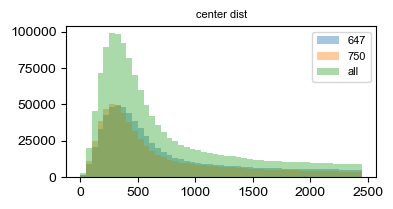

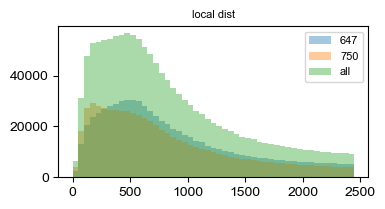

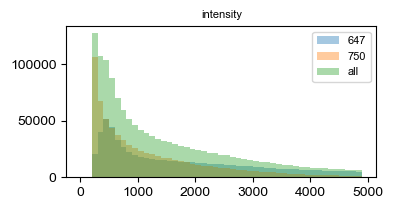

- pick spots by scores
--- multiprocessing maximization step with 16 threads, in 4675.668s
-- region kept: 0.7808


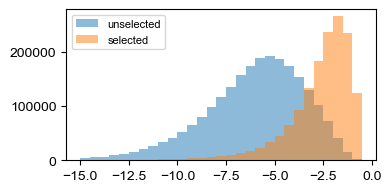

+ iter:1
-- generate reference metrics
--- multiprocessing expectation step with 16 threads, in 62.709s
--- collapse all regions into 1d.


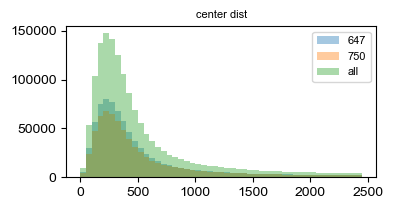

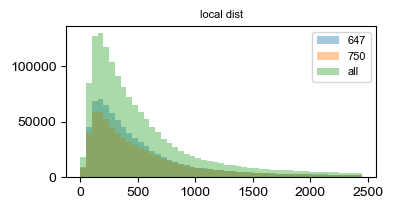

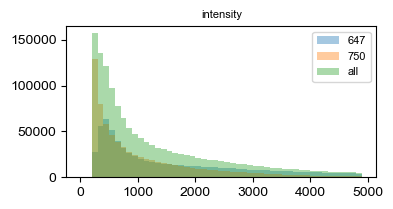

- pick spots by scores
--- multiprocessing maximization step with 16 threads, in 4758.909s
-- region kept: 0.9437


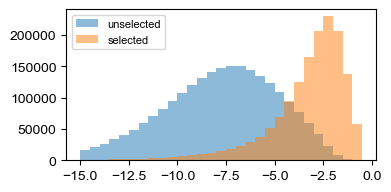

+ iter:2
-- generate reference metrics
--- multiprocessing expectation step with 16 threads, in 62.127s
--- collapse all regions into 1d.


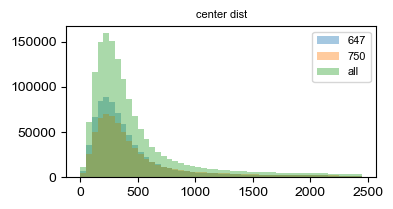

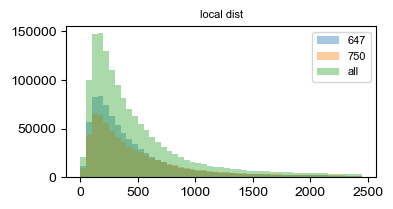

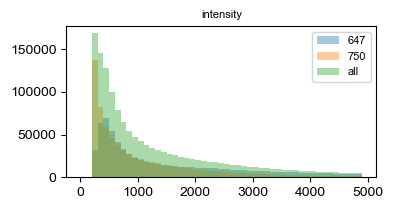

- pick spots by scores
--- multiprocessing maximization step with 16 threads, in 4918.518s
-- region kept: 0.9849


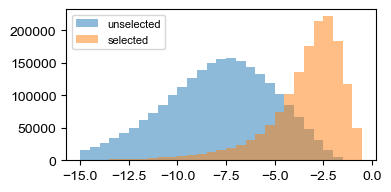

+ iter:3
-- generate reference metrics
--- multiprocessing expectation step with 16 threads, in 61.387s
--- collapse all regions into 1d.


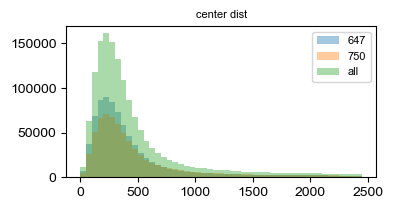

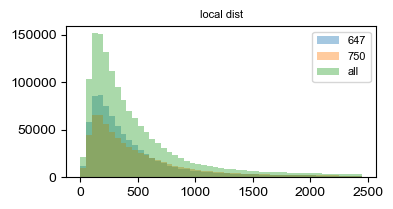

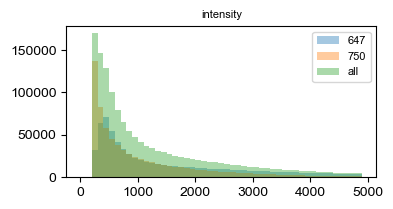

- pick spots by scores
--- multiprocessing maximization step with 16 threads, in 4702.803s
-- region kept: 0.9944


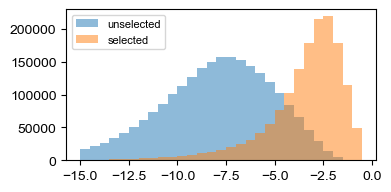

+ iter:4
-- generate reference metrics
--- multiprocessing expectation step with 16 threads, in 63.301s
--- collapse all regions into 1d.


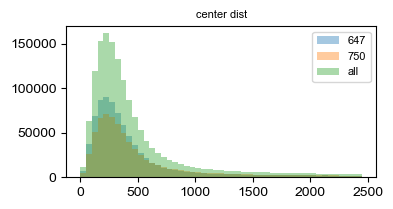

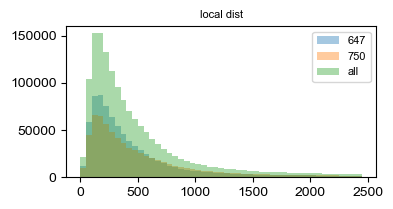

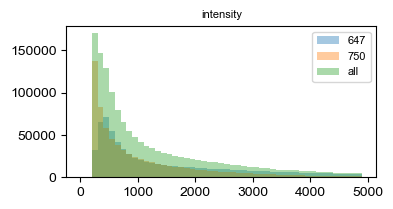

- pick spots by scores
--- multiprocessing maximization step with 16 threads, in 4675.848s
-- region kept: 0.9967


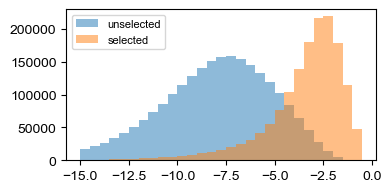

+ iter:5
-- generate reference metrics
--- multiprocessing expectation step with 16 threads, in 63.247s
--- collapse all regions into 1d.


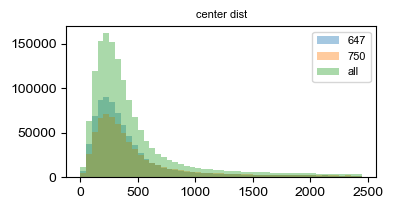

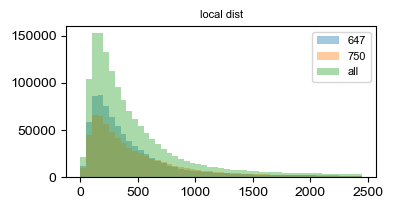

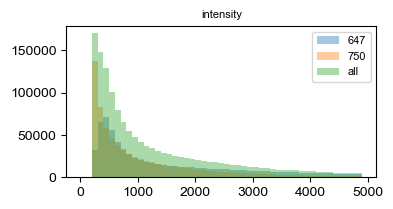

- pick spots by scores
--- multiprocessing maximization step with 16 threads, in 4444.448s
-- region kept: 0.9973


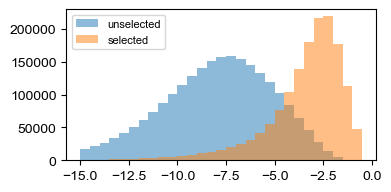

+ iter:6
-- generate reference metrics
--- multiprocessing expectation step with 16 threads, in 57.613s
--- collapse all regions into 1d.


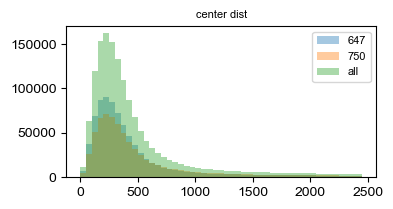

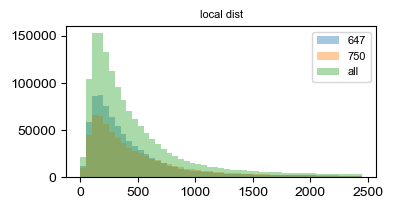

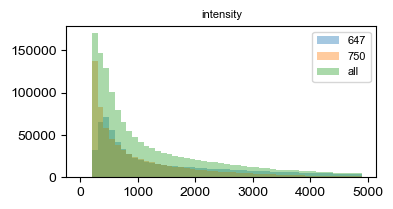

- pick spots by scores
--- multiprocessing maximization step with 16 threads, in 4173.521s
-- region kept: 0.9975


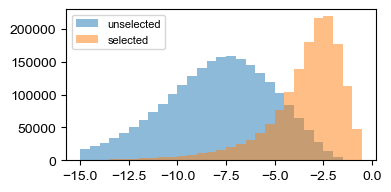

+ iter:7
-- generate reference metrics
--- multiprocessing expectation step with 16 threads, in 62.545s
--- collapse all regions into 1d.


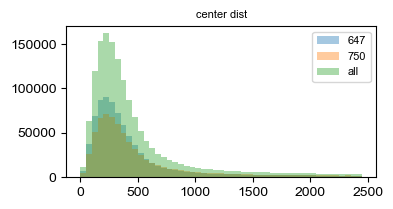

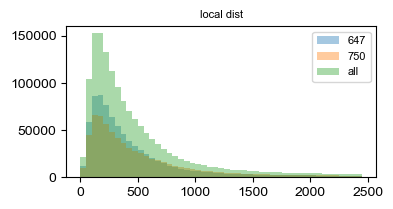

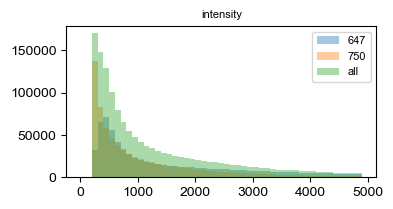

- pick spots by scores
--- multiprocessing maximization step with 16 threads, in 4112.259s
-- region kept: 0.9976


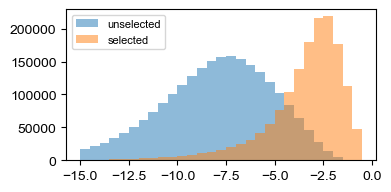

+ iter:8
-- generate reference metrics
--- multiprocessing expectation step with 16 threads, in 58.826s
--- collapse all regions into 1d.


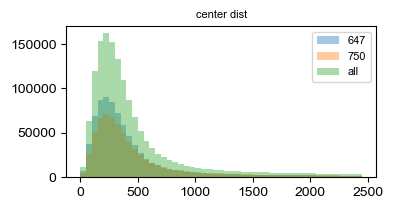

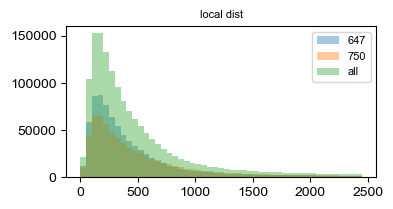

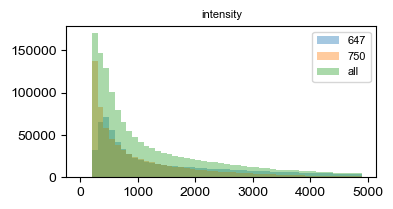

- pick spots by scores
--- multiprocessing maximization step with 16 threads, in 4205.183s
-- region kept: 0.9976


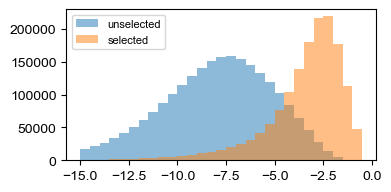

+ iter:9
-- generate reference metrics
--- multiprocessing expectation step with 16 threads, in 58.328s
--- collapse all regions into 1d.


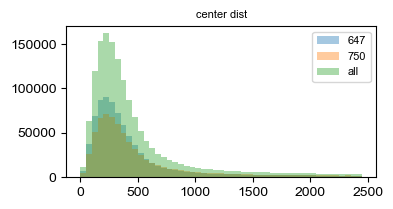

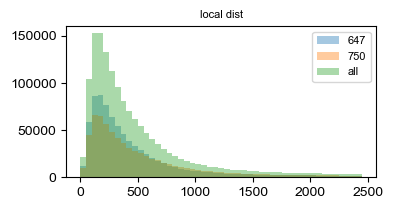

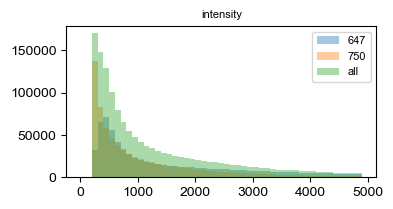

- pick spots by scores
--- multiprocessing maximization step with 16 threads, in 4105.456s
-- region kept: 0.9977


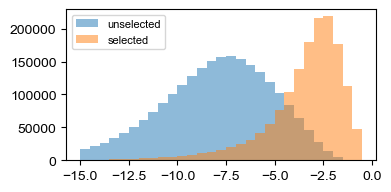

In [8]:
%matplotlib inline
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import _maximize_score_spot_picking_of_chr, pick_spots_by_intensities,pick_spots_by_scores, generate_reference_from_population, evaluate_differences

niter= 10
num_threads = 16
ref_chr_cts = None
n_keep = len(sel_dna_cand_hzxys_list) # 400 # for test
# initialize
init_dna_hzxys = pick_spots_by_intensities(sel_dna_cand_hzxys_list[:n_keep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []

for _iter in range(niter):
    print(f"+ iter:{_iter}")
    # E: generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1], dna_reg_ids,
        ref_channels=dna_reg_channels,
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_channels=True,
        verbose=True,
    )
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ct_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,2500,50), alpha=0.4, label=_k)
    plt.legend(fontsize=8)
    plt.title('center dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_local_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,2500,50), alpha=0.4, label=_k)
    plt.legend(fontsize=8)
    plt.title('local dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ints.items():
        plt.hist(np.array(_v), 
                 bins=np.arange(0,5000,100), 
                 #bins=np.arange(0,15,0.25),
                 alpha=0.4, label=_k)
    plt.legend(fontsize=8)
    plt.title('intensity', fontsize=8)
    plt.show()
    
    # M: pick based on scores
    sel_hzxys_list, sel_scores_list, all_scores_list, other_scores_list = \
    pick_spots_by_scores(
        sel_dna_cand_hzxys_list, dna_reg_ids,
        ref_hzxys_list=sel_dna_hzxys_list[-1], ref_ids=dna_reg_ids, ref_channels=dna_reg_channels,
        ref_ct_dists=ref_ct_dists, ref_local_dists=ref_local_dists, ref_ints=ref_ints, 
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_intensity_channels=True,
        split_distance_channels=True,
        return_other_scores=True,
        verbose=True,
    )
    # check updating rate
    update_rate = evaluate_differences(sel_hzxys_list, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    # append
    sel_dna_hzxys_list.append(sel_hzxys_list)
    sel_dna_scores_list.append(sel_scores_list)
    all_dna_scores_list.append(all_scores_list)
    
    plt.figure(figsize=(4,2), dpi=100)
    plt.hist(np.concatenate([np.concatenate(_scores) 
                       for _scores in other_scores_list]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='unselected')
    plt.hist(np.ravel([np.array(_sel_scores) 
                       for _sel_scores in sel_dna_scores_list[-1]]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='selected')
    plt.legend(fontsize=8)
    plt.show()
    
    if update_rate > 0.998:
        break

In [65]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
kept_chr_ids = []
distmap_list = []
score_th = -4.5
int_th = 300.
bad_spot_percentage = 1

for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    # remove spots by intensity
    _bad_inds = _kept_hzxys[:,0] < int_th
    # remove spots by scores
    _bad_inds += _scores < score_th
    #print(np.mean(_bad_inds))
    _kept_hzxys[_bad_inds] = np.nan
    
    
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        kept_chr_ids.append(True)
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))
    else:
        kept_chr_ids.append(False)

kept_chr_ids = np.array(kept_chr_ids, dtype=np.bool)
kept_chrom_coords = np.array(sel_chrom_coords)[:len(kept_chr_ids)][kept_chr_ids]
kept_fov_ids = np.array(sel_cand_fov_ids)[:len(kept_chr_ids)][kept_chr_ids]

distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

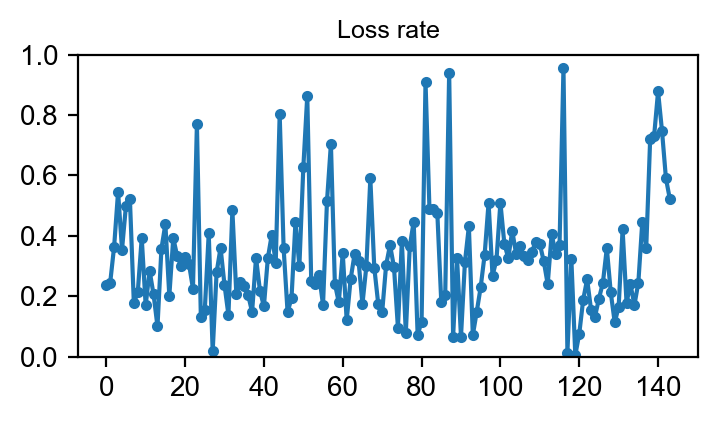

0.32643089754148796


In [66]:
%matplotlib inline
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_xticks(np.arange(0,len(median_distmap),20))
ax.set_ylim([0,1])
ax.set_title(f"Loss rate", fontsize=9)
plt.show()
print(np.mean(loss_rates))

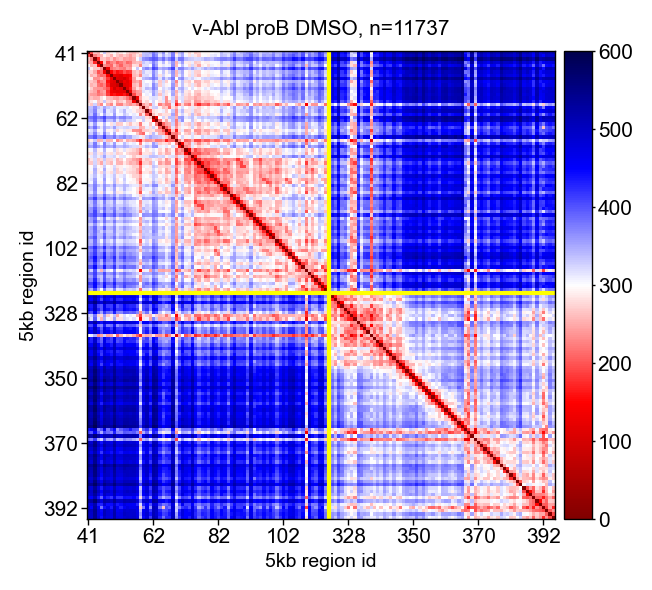

In [67]:
imaging_order = []
for _fd, _infos in fov.color_dic.items():
    for _info in _infos:
        if len(_info) > 0 and _info[0] == 'u':
            imaging_order.append(list(dna_reg_ids).index(int(_info[1:])))
imaging_order = np.array(imaging_order, dtype=np.int)
#kept_inds = imaging_order # plot imaging ordered regions

#kept_inds = np.where(loss_rates<0.6)[0] # plot good regions only
kept_inds = np.arange(len(fov.unique_ids)) # plot all

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,600],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
ax.set_title(f"v-Abl proB DMSO, n={len(distmap_list)}", fontsize=7.5)

_ticks = np.arange(0, len(kept_inds), 20)
ax.set_xticks(_ticks)
ax.set_xticklabels(dna_reg_ids[kept_inds][_ticks])
ax.set_xlabel(f"5kb region id", fontsize=7, labelpad=2)
ax.set_yticks(_ticks)
ax.set_yticklabels(dna_reg_ids[kept_inds][_ticks])
ax.set_ylabel(f"5kb region id", fontsize=7, labelpad=2)


ax.axvline(x=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])
ax.axhline(y=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])

plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

Text(0, 0.5, 'Loss rate')

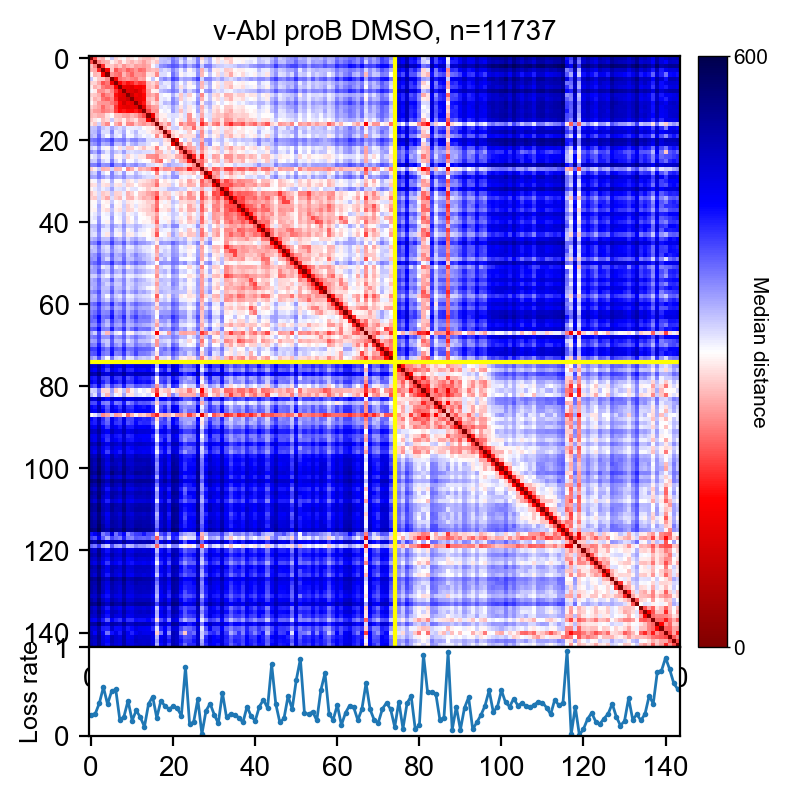

In [71]:
# Required plotting parameters
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width,_font_size
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm

contact_limits = [0.04, 0.8]
contact_norm = LogNorm(vmin=np.min(contact_limits), 
                       vmax=np.max(contact_limits))
contact_cmap = matplotlib.cm.get_cmap('seismic')
contact_cmap.set_bad(color=[0.,0.,0.,1])



fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=200, )
_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)

ax1.axvline(x=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])
ax1.set_title(f"v-Abl proB DMSO, n={len(distmap_list)}", fontsize=10)

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='5%', pad="3%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[0, 600])
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Median distance',
               fontsize=_font_size, labelpad=0, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='15%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 50) )

bot_ax.plot(loss_rates, '.-', markersize=2, linewidth=1)
bot_ax.set_xticks(np.arange(0,len(median_distmap),20))
bot_ax.set_ylim([0,1])
bot_ax.set_ylabel(f"Loss rate", fontsize=9)


In [14]:
np.where(dna_reg_ids >300)

(array([ 74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
         87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143], dtype=int64),)

In [15]:
# calculate RG
reg1_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:74,1:]) for _hzxys in final_dna_hzxys_list]
reg2_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[74:,1:]) for _hzxys in final_dna_hzxys_list]

E:\Users\puzheng\Documents\ImageAnalysis3\spot_tools\scoring.py:416: RuntimeWarning: Mean of empty slice
  _rs = np.linalg.norm(zxys - np.nanmean(zxys, axis=0), axis=1)
E:\Users\puzheng\Documents\ImageAnalysis3\spot_tools\scoring.py:418: RuntimeWarning: Mean of empty slice
  _rg = np.sqrt(np.nanmean(_rs**2))


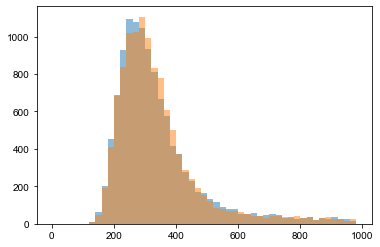

In [16]:
plt.figure()
plt.hist(reg1_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'group 1')
plt.hist(reg2_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'group 2')
plt.show()

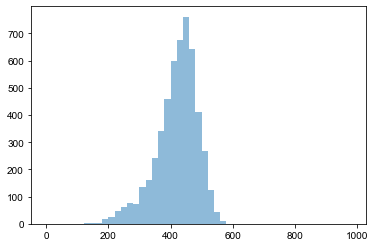

In [13]:
plt.figure()
plt.hist(np.ravel(median_distmap[:74,74:]), bins=np.arange(0,1000,20), alpha=0.5, label=f'group 1')
plt.show()

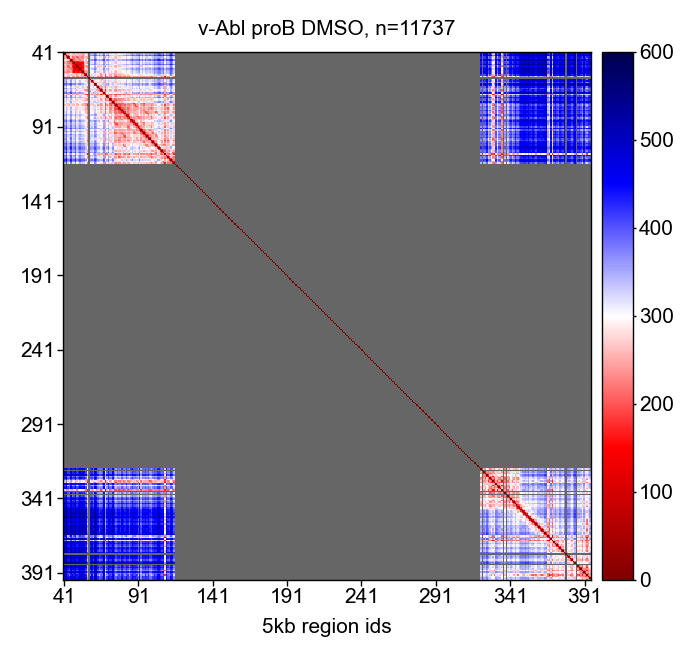

In [31]:
# generate full distmap
full_size = np.max(dna_reg_ids) - np.min(dna_reg_ids)+1

full_median_distmap = np.ones([full_size, full_size])*np.nan
full_median_distmap[np.arange(full_size), np.arange(full_size)] = np.zeros(len(full_median_distmap))
for _i, _id in enumerate(dna_reg_ids-np.min(dna_reg_ids)):
    full_median_distmap[_id, dna_reg_ids-np.min(dna_reg_ids)] = median_distmap[_i]
    

import matplotlib
median_cmap = matplotlib.cm.get_cmap('seismic_r')
median_cmap.set_bad(color=[0.4,0.4,0.4,1])

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(full_median_distmap,
                                               #median_distmap[kept_inds][:,kept_inds], 
                                               cmap=median_cmap,
                                               color_limits=[0,600],
                                               ax=ax,
                                               ticks=np.arange(0, np.max(dna_reg_ids)-np.min(dna_reg_ids), 50),
                                               tick_labels=np.arange(np.min(dna_reg_ids), np.max(dna_reg_ids),50), 
                                               figure_dpi=200)

ax.set_title(f"v-Abl proB DMSO, n={len(distmap_list)}", fontsize=7.5)
ax.set_xlabel(f"5kb region ids", fontsize=7.5)
plt.show()

In [27]:
# load features
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-08_IgH'
feature_2_reg_id = pickle.load(open(os.path.join(pool_folder, 'matched_feature_dict.pkl'), 'rb'))

v_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighv' in _k}
d_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighd' in _k}
j_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighj' in _k}

In [30]:
v_unit_2_inds

{'Ighv5-1P': 30,
 'Ighv5-2': 31,
 'Ighv2-2': 33,
 'Ighv5-4': 35,
 'Ighv2-3': 38,
 'Ighv5-6': 40,
 'Ighv2-4': 46,
 'Ighv5-9': 48,
 'Ighv2-5': 52,
 'Ighv5-12': 56,
 'Ighv2-6': 59,
 'Ighv5-9-1': 63,
 'Ighv5-12-4': 68,
 'Ighv2-9-1': 69,
 'Ighv1-31': 75,
 'Ighv1-32P': 76,
 'Ighv1-33P': 78,
 'Ighv1-34': 80,
 'Ighv1-36': 85,
 'Ighv1-38P': 89,
 'Ighv1-39': 90,
 'Ighv1-40P': 92,
 'Ighv1-42': 95,
 'Ighv1-43': 97,
 'Ighv1-46P': 103,
 'Ighv1-47': 106,
 'Ighv8-4': 112,
 'Ighv1-49': 118,
 'Ighv8-5': 121,
 'Ighv1-50': 130,
 'Ighv1-51P': 133,
 'Ighv1-52': 134,
 'Ighv1-53': 137}

In [28]:
contact_th = 200
contact_map = (distmap_list < contact_th).sum(0) / (np.isnan(distmap_list)==False).sum(0)

[Text(0, 0, 'V units'), Text(0, 0, 'D units'), Text(0, 0, 'J units')]

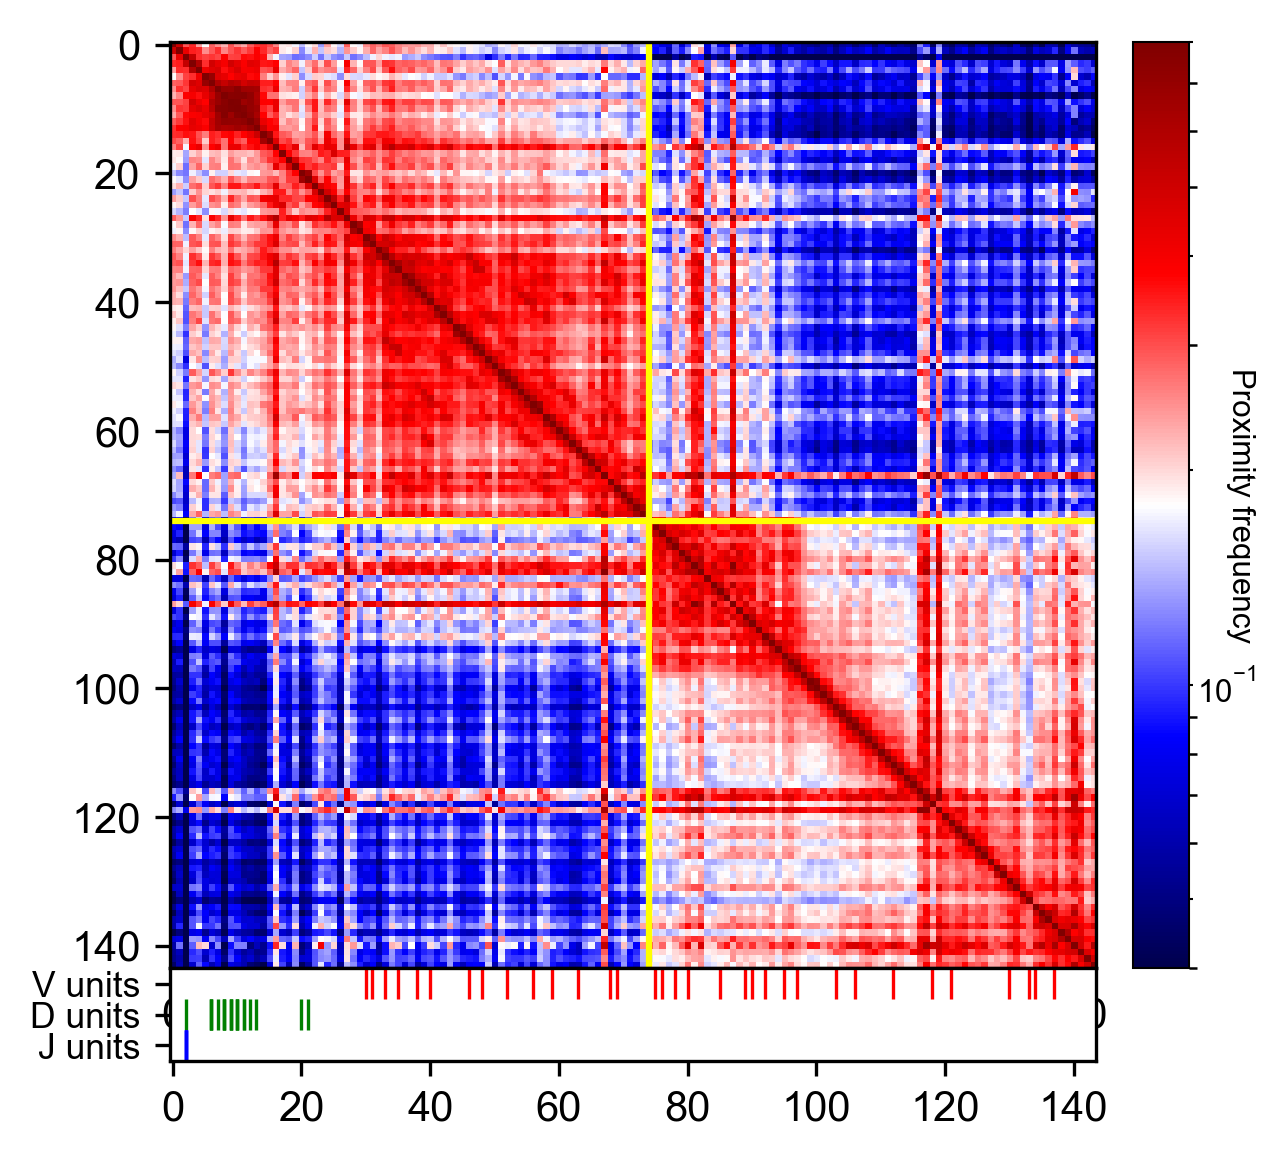

In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm

contact_limits = [0.04, 0.8]
contact_norm = LogNorm(vmin=np.min(contact_limits), 
                       vmax=np.max(contact_limits))
contact_cmap = matplotlib.cm.get_cmap('seismic')
contact_cmap.set_bad(color=[0.,0.,0.,1])



fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=300, )
#_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)

_pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],
                       vmax=contact_limits[1])

ax1.axvline(x=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[0.05, 0.1, 0.2, 0.4, 0.8])
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Proximity frequency',
               fontsize=_font_size, labelpad=0, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='10%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 20) )

bot_ax.eventplot(list(v_unit_2_inds.values()), lineoffsets=2.5, linewidths=0.8, colors='r')
bot_ax.eventplot(list(d_unit_2_inds.values()), lineoffsets=1.5, linewidths=0.8, colors='g')
bot_ax.eventplot(list(j_unit_2_inds.values()), lineoffsets=0.5, linewidths=0.8, colors='b')
bot_ax.set_ylim([0,3])
bot_ax.set_yticks([2.5,1.5, 0.5])
bot_ax.set_yticklabels(["V units", "D units", "J units"], fontsize=_font_size+1)

## visualize single chromosome

In [33]:
plt.close('all')

<IPython.core.display.Javascript object>


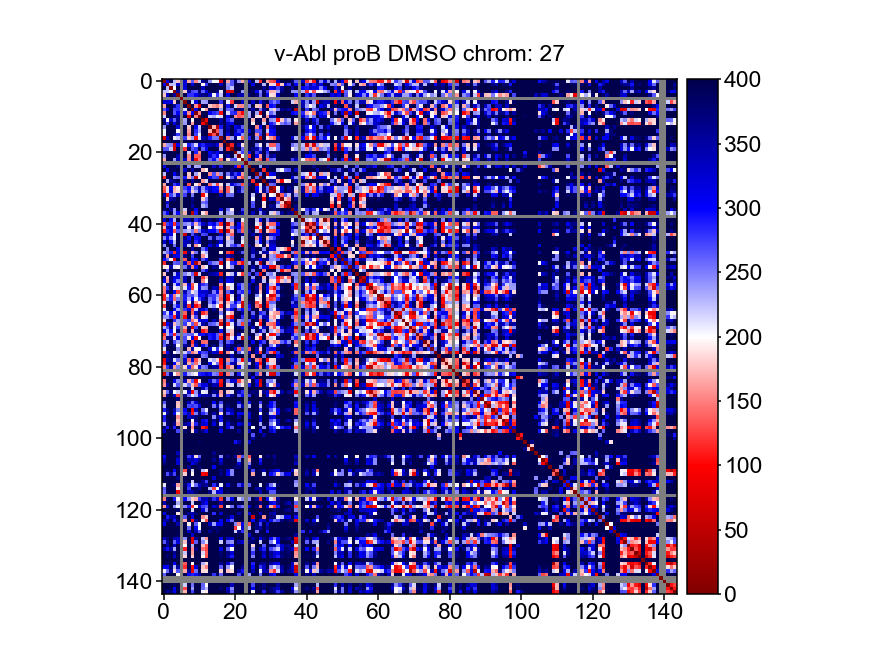

<IPython.core.display.Javascript object>


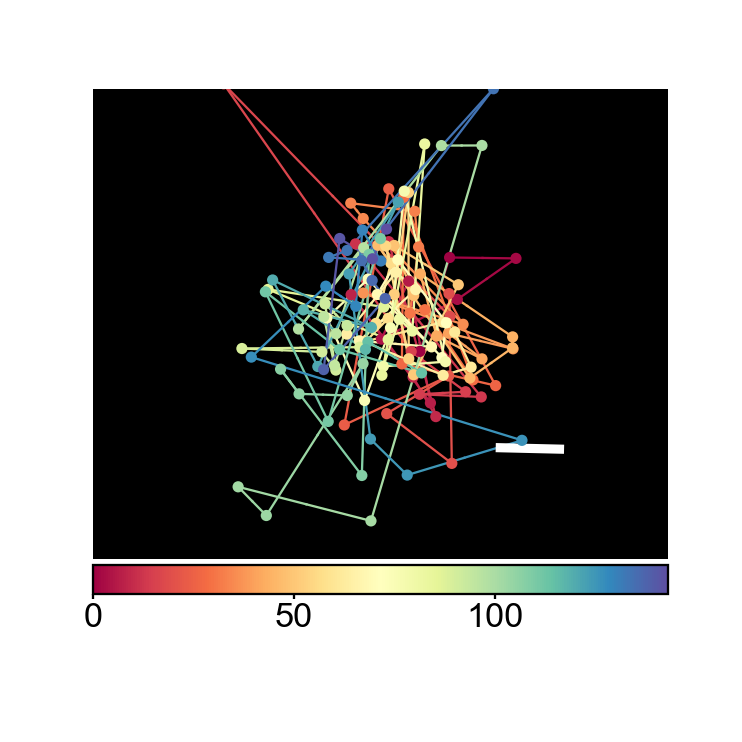

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x000002082C6237F0>


In [64]:
%matplotlib notebook
%matplotlib notebook

reload(figure_tools.image)

chrom_id = 27

import matplotlib
import copy

sc_cmap = copy.copy(matplotlib.cm.get_cmap('seismic_r'))
sc_cmap.set_bad(color=[0.5,0.5,0.5,1])

#valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]
valid_inds = np.ones(len(final_dna_hzxys_list[chrom_id]), dtype=np.bool) # all spots

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(
        distmap_list[chrom_id][valid_inds][:,valid_inds], 
        color_limits=[0,400],
        ax=ax,
        cmap=sc_cmap,
        ticks=np.arange(0,150,20), 
        figure_dpi=200)
ax.set_title(f"v-Abl proB DMSO chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

ax3d = figure_tools.image.chromosome_structure_3d_rendering(
        final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
        marker_edge_line_width=0,
        reference_bar_length=200, image_radius=200,  pca_align=True,
        line_width=0.5, figure_dpi=300, depthshade=False)
plt.show()

# Save to a temp file

In [21]:
# save picked_spots
overwrite_savefile = True

save_filename = os.path.join(fov.save_folder, f"Picked_spots_fov_{np.min(kept_fov_ids)}-{np.max(kept_fov_ids)}.pkl")

if not os.path.exists(save_filename) or overwrite_savefile:
    # assemble data dict
    picked_data = {
        'hzxys': final_dna_hzxys_list,
        'chrom_coords':kept_chrom_coords,
        'sel_scores': [_s for _s, _flag in zip(sel_dna_scores_list[-1], kept_chr_ids) if _flag],
        'other_scores': [_s for _s, _flag in zip(other_dna_scores_list[-1], kept_chr_ids) if _flag],
        'fov_ids': kept_fov_ids,
        'intensity_th': int_th,
        'score_th': score_th,
        'parameters': fov.shared_parameters,
    }
    picked_data['Notes'] = "Saved on April 7th, 2021\n"

    # save
    print(f"save to file: {save_filename}")
    pickle.dump(picked_data, open(save_filename, 'wb'))

save to file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210326_IgH_proB_DMSO\Picked_spots_fov_3-22.pkl


In [43]:
len(picked_data['sel_scores'])

5628

187.37310329656003


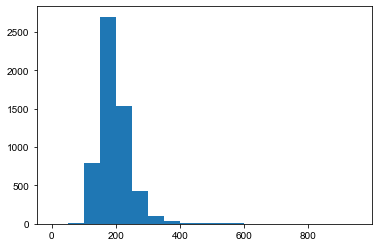

In [47]:
#radius of gyration
rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:72,1:]) for _hzxys in final_dna_hzxys_list]
print(np.median(rgs))
plt.figure()
plt.hist(rgs, bins=np.arange(0,1000,50))
plt.show()